In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.spatial.distance import cdist

In [2]:
from osgeo import gdal

dataset = gdal.Open("l8b30f30clip.tif", gdal.GA_ReadOnly)
array = np.array([dataset.GetRasterBand(1).ReadAsArray().flatten()])
for x in range(2, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(x)
    array = np.append(array,[band.ReadAsArray().flatten()],axis=0)
    
array = np.transpose(array)

In [33]:
!gdalinfo l8b30f30clip.tif

Driver: GTiff/GeoTIFF
Files: l8b30f30clip.tif
Size is 320, 484
Coordinate System is:
PROJCS["NAD83 / UTM zone 11N",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.2572221010042,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-117],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","26911"]]
Origin = (480894.462985141202807,3667501.770068448036909)
Pixel Size = (30.000150431971996,-30.004888571167658)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left 

In [3]:
len(array)

154880

In [4]:
y=[]
for i in range(len(array)):
    j=[]
    a = (float(array[i][4]) - array[i][3]) / (float(array[i][4]) + array[i][3])
    j.append(a)
    y.append(j)

In [5]:
array=np.append(array,y,axis=1)

In [6]:
array.shape

(154880, 9)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(array.astype(np.float64))
new_array=scaler.transform(array.astype(np.float64))

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=6)
pca.fit(new_array)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca_features=pca.fit_transform(new_array)

In [12]:
pca_features[0]

array([ 2.6781367 ,  0.6656055 ,  0.46970456, -0.75200021, -0.1973811 ,
        0.03468697])

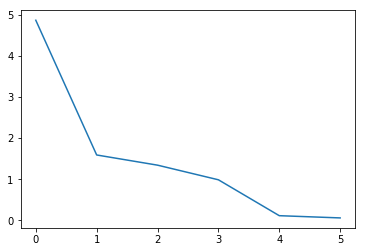

In [13]:
plt.plot(pca.explained_variance_)
plt.show()

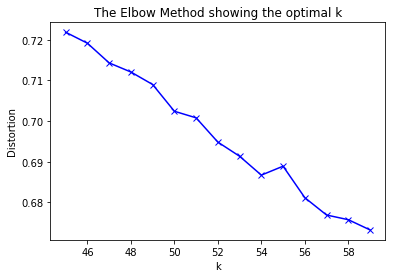

In [32]:
# k means determine k
distortions = []
K = range(45,60)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(pca_features)
    distortions.append(sum(np.min(cdist(pca_features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_features.shape[0])
    
#Plot the elbow

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
a = cluster.AgglomerativeClustering(n_clusters=k)

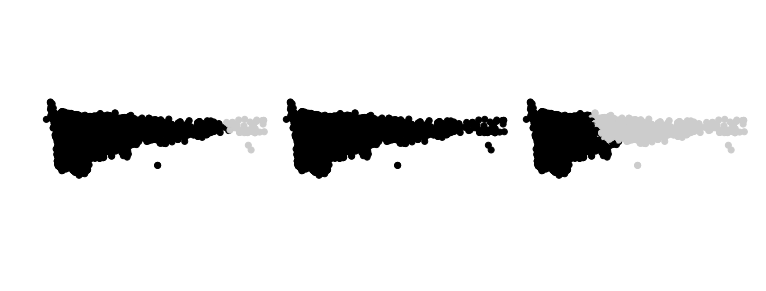

In [34]:
plt.figure(figsize=(10, 4))
for index, linkage in enumerate(('average', 'complete', 'ward')):
    plt.subplot(1, 3, index + 1)
    model = cluster.AgglomerativeClustering(linkage=linkage,
                                            #connectivity=connectivity,
                                            n_clusters=2)
    #t0 = time.time()
    x=pca_features[:50000]
    model.fit(x)
    #elapsed_time = time.time() - t0
    plt.scatter(x[:, 0], x[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
    #plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
     #                 fontdict=dict(verticalalignment='top'))
    plt.axis('equal')
    plt.axis('off')
    plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
    #plt.suptitle('n_cluster=%i, connectivity=%r' %
    #                     (n_clusters, connectivity is not None), size=17)
plt.show()

In [ ]:
# k means determine k
distortions = []
K = range(5,25)
for k in K:
    kmeanModel = cluster.AgglomerativeClustering(n_clusters=k)
    #kmeanModel.fit(array.astype(np.float64))
    labels = kmeanModel.fit_predict(array.astype(np.float64))
    distortions.append(sum(np.min(cdist(array.astype(np.float64), kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / array.shape[0])
    
#Plot the elbow

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
import sys
import os
sys.path.append('U:\jup_file')
from Silhouette_Analysis import silhouette_analysis
import pandas as pd

In [21]:
df = pd.DataFrame(array)

In [22]:
df

,0,1,2,3,4,5,6,7
0,0.168692,0.159175,0.159263,0.178694,0.251161,0.240562,0.183507,0.000508
1,0.172710,0.165755,0.166749,0.183088,0.256526,0.238288,0.175978,0.000883
2,0.154273,0.142770,0.139171,0.151889,0.240275,0.241114,0.168957,0.000972
3,0.153037,0.140208,0.129787,0.135594,0.201812,0.188851,0.129301,0.000751
4,0.157254,0.145154,0.133054,0.136411,0.177104,0.173947,0.122125,0.001192
5,0.157254,0.145154,0.133054,0.136411,0.177104,0.173947,0.122125,0.001192
6,0.162377,0.147848,0.137404,0.136433,0.172180,0.156327,0.116804,0.000905
7,0.147097,0.128661,0.109915,0.102385,0.152684,0.121308,0.080416,0.000795
8,0.147296,0.137758,0.132856,0.152110,0.233364,0.256592,0.163834,0.000994
9,0.151006,0.141931,0.141688,0.156062,0.260633,0.270768,0.175117,0.001347


In [31]:
#Perform silhouette analysis to see the cluster relevance
silhouette_analysis([5,6,7,8,9,10],df.as_matrix())

MemoryError: 

In [138]:
#band 1-9, no 8
l8 = gdal.Open("l8b30f30clip.tif", gdal.GA_ReadOnly)

In [183]:
driver = gdal.GetDriverByName('GTiff')
filename = 'new.tif'
x_pixels = l8.RasterXSize
y_pixels = l8.RasterYSize

new = driver.Create(
    filename,
    x_pixels,
    y_pixels,
    3,
    gdal.GDT_Float32) 

new.GetRasterBand(1).WriteArray(l8.GetRasterBand(4).ReadAsArray())
new.GetRasterBand(2).WriteArray(l8.GetRasterBand(3).ReadAsArray())
new.GetRasterBand(3).WriteArray(l8.GetRasterBand(2).ReadAsArray())

driver = gdal.GetDriverByName( 'MEM' )
driver2 = gdal.GetDriverByName( 'PNG' )
ds = driver.Create( '', 255, 255, 1, gdal.GDT_Int32)
ds2 = driver.CreateCopy('/tmp/out.png', ds, 0)

#gdal.Translate('out.png', new, format = 'PNG')
new.FlushCache()  # Write to disk.
new = None

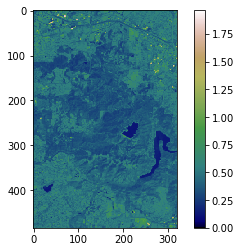

In [172]:
plt.imshow (l8.GetRasterBand(4).ReadAsArray()+l8.GetRasterBand(3).ReadAsArray()+l8.GetRasterBand(5).ReadAsArray(), interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth)
plt.colorbar()
plt.show()

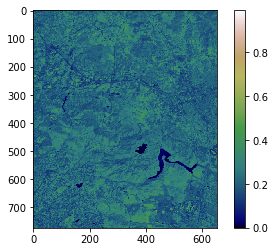

In [89]:
plt.imshow (dataset.GetRasterBand(6).ReadAsArray(), interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth)
plt.colorbar()
plt.show()